* Day05 - # Titanic
* Day09 - 03:48 # keras

# Predict survival on the Titanic disaster with keras and deep learning
https://www.kaggle.com/competitions/titanic

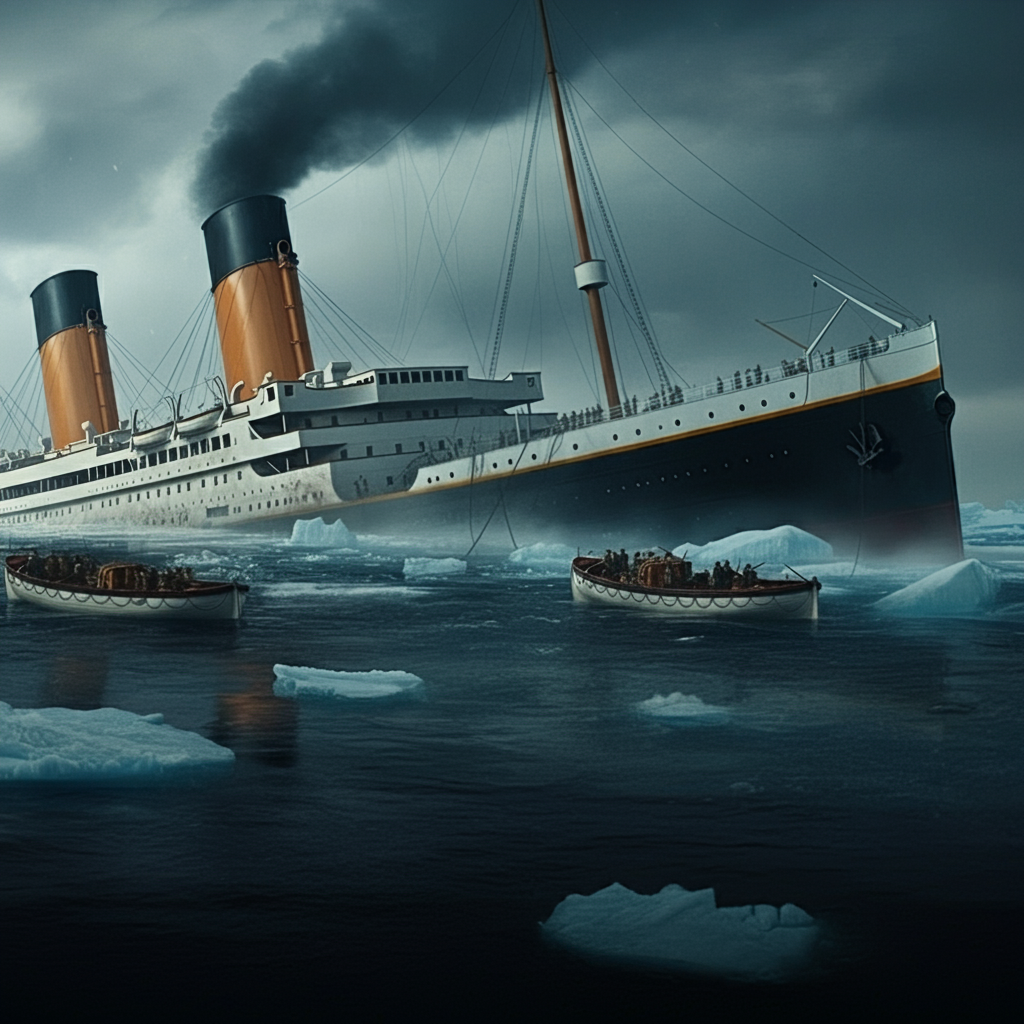

In [1]:
# prompt: import and show a photo from computer "C:\Users\alperugurcan\Downloads\image_fx_"

from IPython.display import Image
Image(filename='image_fx_.jpg')


## Data Preparation

In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# Merge train and test
df = pd.concat([train_data,test_data])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [6]:
# İndex reset
df = df.reset_index(drop=True)

# Fare column fill with mean
df.Fare.fillna(df.Fare.mean(),inplace=True)

# Embarked column fill with mode
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

# Title column preparation
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.",expand=True)
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")


# Age column fill with title and age groupby and use median
df["Age"] = df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

# Cabin column soo much missing values so we drop
df.drop("Cabin",axis=1,inplace=True)

# Passenger id and ticket column drop
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

# Drop name
df.drop("Name",axis=1,inplace=True)

In [7]:
df.isnull().sum()

,0
Survived,418
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0


In [8]:
df=pd.get_dummies(df,drop_first=True)

In [27]:
# split data
train = df[:891]
test = df[891:]

test = test.reset_index(drop=True)

# Prepare train and test
x = train.drop("Survived", axis=1)
y = train["Survived"]

## Deep Learning with tensorflow keras

In [11]:
import tensorflow as tf  # TensorFlow kütüphanesini içe aktarır

from tensorflow.keras.models import Sequential  # Sequential modelini Keras'tan içe aktarır
from tensorflow.keras.layers import Dense  # Dense (tam bağlantılı) katmanını Keras'tan içe aktarır

In [12]:
# Model oluştur

model = Sequential()

# ilk layeri ekle
# activation = weight vb. dataya bakarak verinin geçip geçmeyeceği
model.add(Dense(64,activation='relu')) # input
model.add(Dense(32,activation='relu')) # hiddens
model.add(Dense(16,activation='relu')) # hiddens
model.add(Dense(1,activation='sigmoid')) # output - cevabı evet hayır olduğu için sigmoid'e döndük
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # araştır

In [13]:
history = model.fit(x,y,epochs=250,batch_size=32,validation_split=.2,verbose=1) # Modeli eğitiyoruz

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6259 - loss: 0.7590 - val_accuracy: 0.7039 - val_loss: 0.5560
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6883 - loss: 0.5862 - val_accuracy: 0.7598 - val_loss: 0.5138
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.5807 - val_accuracy: 0.7598 - val_loss: 0.5185
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7021 - loss: 0.5812 - val_accuracy: 0.8101 - val_loss: 0.5232
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5817 - val_accuracy: 0.7709 - val_loss: 0.4762
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7199 - loss: 0.5536 - val_accuracy: 0.7989 - val_loss: 0.4668
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5364 - val_accuracy: 0.8547 - val_loss: 0.4305
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7515 - loss: 0.5562 - val_accuracy: 0.8045 -

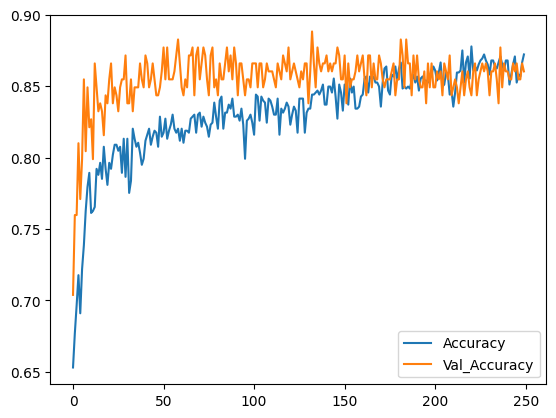

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

In [17]:
from sklearn.preprocessing import normalize, scale

# Scale ederek DL
x = train.drop("Survived", axis=1)
y = train["Survived"]

x = scale(x)

In [18]:
history_scale = model.fit(x,y,epochs=250,batch_size=32,validation_split=.2,verbose=1) # Modeli eğitiyoruz

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5644 - loss: 2.2015 - val_accuracy: 0.8212 - val_loss: 0.4734
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7678 - loss: 0.5283 - val_accuracy: 0.8659 - val_loss: 0.4247
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8113 - loss: 0.5150 - val_accuracy: 0.8715 - val_loss: 0.3919
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.4712 - val_accuracy: 0.8492 - val_loss: 0.3714
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: 0.4357 - val_accuracy: 0.8603 - val_loss: 0.3608
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.4150 - val_accuracy: 0.8603 - val_loss: 0.3544
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.4511 - val_accuracy: 0.8547 - val_loss: 0.3485
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8361 - loss: 0.3962 - val_accuracy: 0.8715 - v

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

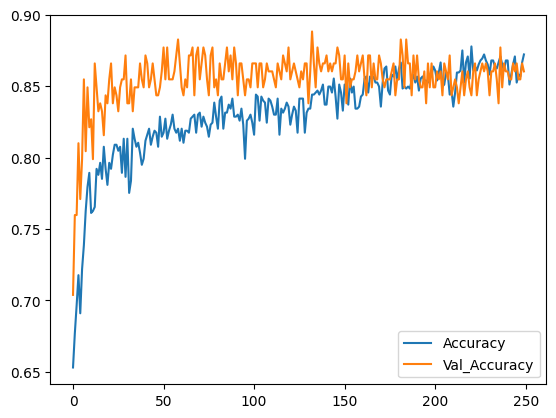

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [29]:
X_test = test.drop("Survived", axis=1)
y_test = test["Survived"]

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0000e+00 - loss: nan
Test loss: nan, Test accuracy: 0.0000


In [32]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [33]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred[:, 0]})
submission.to_csv('Titanic_Keras.csv', index=False)

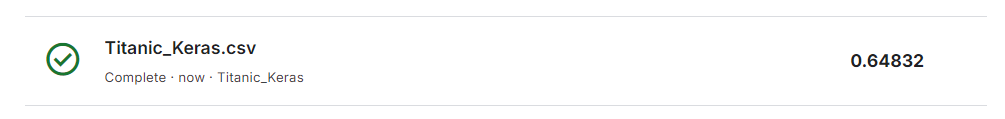

In [ ]:
# Something is wrong but I can't figure out why